# 本周内容的概括：
 - 学习问题的类型
 - 分类vs回归
 - 性能指标
 - 泛化和过拟合
 - 训练，验证，测试

# 1. 学习问题的类型
- 有监督的学习  
- 无监督的学习
- 强化学习

# 2. 有监督的学习：
使用有label的数据训练  
两个步骤：训练/学习，预测/推论  
实质：训练一个未知的函数：
$$
f:V \rightarrow O
$$
$V$：一个n维的feature空间  
>    - 每一种标签就算有一维  
>    - 标签举例：有没有腿，有没有手，能不能跑，是不是狗，是不是猫  

$O$：一个输出空间，通常是一维
  
  
训练的目标：近似得到一个函数$f$，使此函数能从数据返回正确的label  

例子：
> MNIST图像分类：
>  - 输入：28x28的图像，被压缩成一个724的一维向量作为输入  
>  - 输出：0-9之间的一个数字  

> 房价预测：
>  - 输入：四维实数：industry，rooms，tax，crime
>  - 输出：一维实数：房价

# 3. 无监督的学习  

用无label的数据训练  
把数据喂给模型，模型根据数据点之间的相似度，把数据分割成若干点云  
在数据空间中识别未知的pattern  
数据点（其实是数据向量）之间的距离是一个重要的概念  
数据之间的相似度和距离概念起主导作用  
例子：
> 信息检索
> - 对文件聚类
> - 检索相似的文件
> - feature空间是一组词汇
> - 用矢量空间来表示文件

> 诈骗信息检测
> - 对转账的聚类
> - 标示出离群点
> - 样本空间可以包含位置，商家，日期等 

# 4. 分类vs回归

首先，这俩都属于受监督的学习  
他俩的主要区别在于输出空间不同  

> 分类：
> - 将输入分为若干个class。比如：猫/狗/鸟
> - 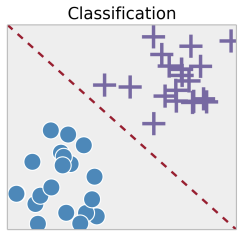
> - 输出是若干class：$O = \{c_1,c_2,c_3,...,c_k\}$

> 回归：
> - 找到一个能代表数据模式的函数（what the data is doing?）
> - 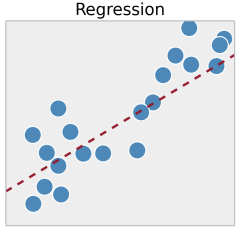
> - 输出是一条实数空间中的线（real line）: $O=R$，如上图中的红线

> 例子：
> - MNIST问题：分类问题
> - 场景气氛标签分析：两种皆可
>   - 如果$O = \{positive, neutral, negative\}$，就属于分类问题
>   - 如果$O \in [0,1]$，就属于回归问题
> - 房价预测：回归问题

# 5. 性能指标
## 5.1. 分类的性能指标

|类型|预测|实际|
|:-:|:-:|:-:|
|TP|T|T|
|TN|F|F|
|FP|T|F|
|FN|F|T|

<br></br>
Confusion Matrix：
下方表格横行为预测值，纵行为真值

||猫|不是猫|
|:-:|:-:|:-:|
|猫|TP|FN|
|不是猫|FP|TN|


正确率（Accuracy）：$Accuracy = \frac{TP+TN}{Total} = \frac{正确标记的个体}{总个体数}$，即上方表格中的对角线元素
 - Accuracy在N和P两侧不对等的时候不灵。譬如预测地震，即使预测每天都不震，正确率依然很高

精确度（Precision）：$Precision = \frac{TP}{TP+FP}=\frac{TP}{所有被标记为P的个体数}$，即上述表格中竖着的第一列

 - 高Prescision：你标为P的很可能是对的，但不一定漏掉了多少真的P
 - FN的高低不会体现在这个参数中。也就是说被误标为N的P的数量不会反应在这里

召回率（Recall）：$Recall = \frac{TP}{TP+FN} = \frac{TP}{所有实际的P} = 所有P中有多少被检测到$，即上述表格中的横着的第一列
 - 高Recall：标记为N的正确率是高的，但是P的正确率不保证
 - FP的高低不会体现在这个参数中，也就是说误标多少P为N也不影响这个指标

F1:  
Harmonic mean of precision and recall  

$ 
\begin{aligned}
F1 &= \frac{2}{Precision^{-1}+Recall^{-1}} 
&=2*\frac{Precision*Recall}{Precision+Recall}
\end{aligned}
$

多个label时的计算方法：详参Week13PDF3 P14

 - Accuracy： 取Confusion Matrix的对角线为分子，分母为总的数据数
 - Precision：取此class所在的竖着的一列。就能算出单个class的Precision，然后对所有的Precision取平均即为总结果
 - Recall：取此class所在的横着的一列，就能算出单个class的Recall，然后对所有的Recall取平均即为总结果


## 5.2 回归的性能指标

图的规格：横轴输入，纵轴输出。
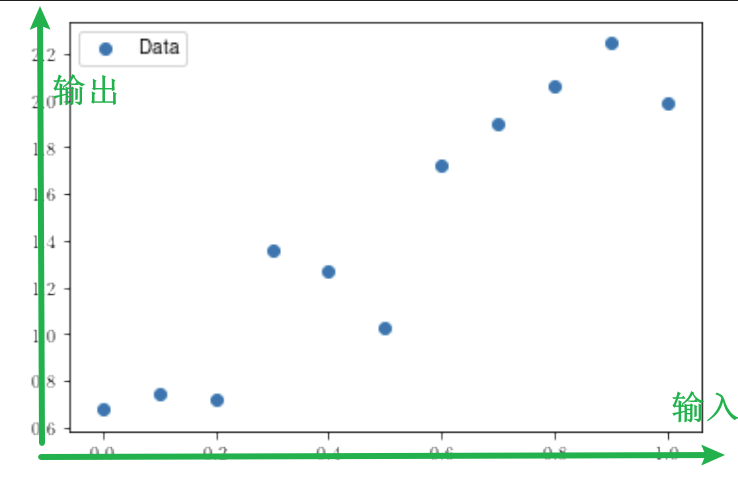

MSE：
 - Error：真值-预测值 $y-f(\vec{x})$
 - Squared Error：Error的平方
 - Mean SE：SE除以数据点个数

其他Metrics：
 - Root MSE: MSE开根号
 - Mean Absolute Error: 误差绝对值之和/数据点个数
 - 这些指标没有MSE对误差那么灵敏
  
$R^2$:

$ = 1-\frac{\sum(真值-预期值)^2}{\sum(真值-真值的平均值)^2}$

 - $R^2$的值越接近1越好
 - 也就是说，后面这一嘟噜越接近0越好
 - 也就是说，每个预期值越接近真值越好

# 6. 泛化

怎么获得泛化能力可以的模型：

数据分组技巧：
> 把数据分成`训练，验证，测试`三个集(train validation, test)
> 
> 用`训练`数据练，每次练完用`验证`集验证性能，只要开始滑坡了，就拉倒，用`测试`集计算其性能参数

> K-fold：降低上述分组中运气因素对结果性能的影响的一种手法
>
> 将数据分为若干个同等大小的组
>
> 每次取其中一组作为`测试（test）`，剩余组作为训练组

# 7. 作业


环境准备：


In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

数据准备: 一些关于红酒的数据

In [92]:
from sklearn import datasets

# 加载原始数据
wine = datasets.load_wine()

# 拆分数据
X = wine.data    # 数据
y = wine.target  # label

In [93]:
#看一下数据里面是什么形状

print(X.shape) # 178个13维feature空间
print(y.shape) # 178个label，012三个label
print(np.unique(y)) # 只有三个label

(178, 13)
(178,)
[0 1 2]


把数据分割为训练和测试集：

In [94]:
from sklearn.model_selection import train_test_split

# 分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# test_size 参数的作用：从总数据点中抽出 test_size*总数据数 数量的数据作为test集的内容

KNN

1. 调库侠

In [95]:
# KNN调库侠
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# 用训练集拟合
knn.fit(X_train,y_train)

# 用测试集测试
ypred_test = knn.predict(X_test)

In [96]:
# 建立cm并从confusion matrix得到性能参数
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,ypred_test)

print(cm)
print("横: Prediction 0 1 2")
print("纵: Actural/GT 0 1 2")

# 手动写的confusion matrix
cm_artificial = [[13,  0,  1],[ 0,  8,  6],[ 1,  2,  5]]


[[11  1  0]
 [ 0 10  2]
 [ 3  6  3]]
横: Prediction 0 1 2
纵: Actural/GT 0 1 2


In [97]:
# 写一个对于某一类的TP, FP, TN, FN生成函数，从cm得结果
def ConfusionMatrixReader(cm, class_number):

    rows = np.size(cm, 0)
    cols = np.size(cm, 1)
    TP = cm[class_number, class_number]
    FN = 0  # 初始化FN
    for i in range(cols):
        if i is not class_number:
            FN += cm[class_number, i]
    FP = 0  # 初始化TN
    for i in range(rows):
        if i is not class_number:
            FP += cm[i,class_number]
    TN = 0 # 初始化TN
    for i in range(rows):
        if i is not class_number:
            for j in range(cols):
                if j is not class_number:
                    TN+=cm[i,j]
    return(np.array([TP,FP,TN,FN]))


result = ConfusionMatrixReader(cm, 0)
print(result)

[11  3 21  1]


In [98]:
# 官方的计算性能参数的库：
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [99]:
# 计算Accuracy的函数

def my_accuracy(y, pred):
    # Write your answer here
    correct = np.sum(y==pred)
    acc = correct/len(y)
    return acc

print(my_accuracy(y_test,ypred_test))
#print((cm[0][0]+cm[1][1]+cm[2][2])/len(y_test)) 用confusion matrix的对角线元素验算了，结果是对的

# 验算：
accuracy_score(y_test,ypred_test)==my_accuracy(y_test,ypred_test)

0.6666666666666666


True

In [100]:
# 计算recall的函数
def my_recall_macro(y, pred):
    recalls = []
    cm = confusion_matrix(y, pred)
    
    class_labels = np.unique(y)
    class_count = len(class_labels)

    for i in range(class_count): # 遍历各个class
        current_class = class_labels[i]
        # 算TP
        TP = cm[i,i]
        # 算FN
        FN = 0
        for j in range(class_count):
            if j is not i:
                FN+=cm[i,j]
        recall_current = TP/(TP+FN)
        recalls.append(recall_current)
    return np.mean(recalls)   

my_recall_macro(y_test,ypred_test)

# 验算
my_recall_macro(y_test,ypred_test)==recall_score(y_test,ypred_test,average = "macro")

True

In [101]:
# 计算precision的函数：
def my_precision_macro(y, pred):
    # Write your answer here
    precisions = []
    cm = confusion_matrix(y, pred)

    class_labels = np.unique(y)
    class_count = len(class_labels)

    for i in range(class_count):
        current_class = class_labels[i]
        TP = cm[i, i]
        FP = 0
        for j in range(class_count):
            if j is not i:
                FP += cm[j, i]
        precision_current = TP/(TP+FP)
        precisions.append(precision_current)
    return np.mean(precisions)


# 验算：
my_precision_macro(y_test, ypred_test) == precision_score(
    y_test, ypred_test, average="macro")


True

回归问题的计算：

Text(0, 0.5, 'y')

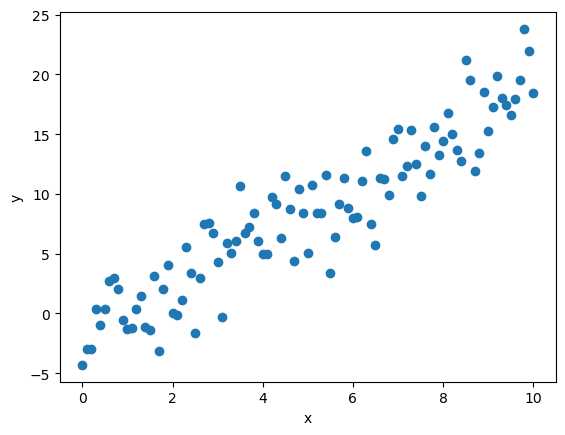

In [102]:
# 散点数据集的创建
rng = np.random.default_rng(10) 
a = 2
b = -1

X = np.linspace(0, 10, 101) 

Y = a*X + b

Y = Y + 3*rng.standard_normal(len(Y)) 

fig, ax = plt.subplots() # This generates us a named figure and axes
ax.scatter(X, Y, label = 'Data') # We generate a scatterplot of the data on the axes.
plt.xlabel('x')
plt.ylabel('y')

In [103]:
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)


In [104]:
# 初始化线性回归器(调库侠)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [105]:
# 重塑X形状，变成一列
X_train = X_train.reshape(-1,1) 

# 练 
lr.fit(X_train,y_train)

LinearRegression()

In [106]:
# 看一下斜率和截距

print(lr.coef_)       # 斜率
print(lr.intercept_)  # 截距


[2.09267731]
-1.9096513207516228


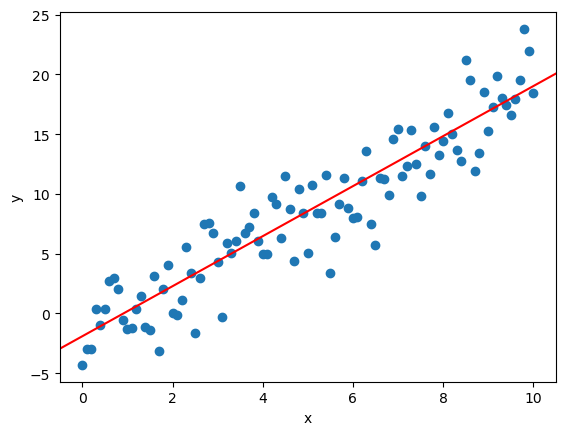

In [107]:
# 用练出来的斜率和截距把线画出来

fig, ax = plt.subplots()  # This generates us a named figure and axes
# We generate a scatterplot of the data on the axes.
ax.scatter(X, Y, label='Data')
plt.xlabel('x')
plt.ylabel('y')

x1 = 0
y1 = lr.coef_[0]*x1+lr.intercept_

plt.axline((x1, y1), slope=lr.coef_[0], color="r")


In [108]:
# 用训练的回归线进行预测

ypred_test = lr.predict(X_test.reshape(-1,1))


In [112]:
# 计算MSE的函数

from sklearn.metrics import mean_squared_error


def MSE(y, pred):
    ## TODO###
    MSE = 0
    for i in range(len(y)):
        MSE += np.square(y[i]-pred[i])
    MSE = MSE/len(y)
    return MSE


# 验算
print(MSE(y_test, ypred_test))
print(mean_squared_error(y_test, ypred_test))


7.164993611960355
7.164993611960354


In [113]:
# 计算R2的函数
def rsq(y, pred):
    ##TODO###
    r2=r2top=r2bottom=0
    ymean = np.mean(y)
    for i in range(len(y)):
        r2top+=np.square(y[i]-pred[i])
        r2bottom+=np.square(y[i]-ymean)
    r2 = 1-r2top/r2bottom
    return r2

# 验算
from sklearn.metrics import r2_score
rsq(y_test, ypred_test) == r2_score(y_test, ypred_test)

True

K-Fold 交叉验证

接下来的例子是使用`决策树`来`分类`。

会对决策树的不同深度进行多次拟合，最后决定最佳参数

详细见本周的那个labsheet，接下来只会写怎么使用kfold生成器制作kfold分组的数据

In [114]:
# 创建数据集

from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 2000, n_features = 10, n_classes=4, n_informative = 3, random_state=10)
print(np.unique(y)) # y是label，x是数据本身

Xtr,Xtest,ytr,ytest=train_test_split(X,y,test_size=0.2)

[0 1 2 3]


In [117]:
# 设置KFold生成器

from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=63, shuffle=True) # 10个fold

In [125]:
# 如何使用？
for train_index, val_index in kf.split(Xtr):
    Xtrain, Xval = Xtr[train_index], Xtr[val_index]
    ytrain, yval = ytr[train_index], ytr[val_index]
    print(np.shape(train_index))
    print(np.shape(val_index))
    # 注意到了吗，这个重复的次数和上面设的n_splits=10是一样的
print(np.shape(Xtr)[0]/10) # Xtr是1600个13维向量，kfold返回随机选取的train组下标和val组下标
    

(1440,)
(160,)
(1440,)
(160,)
(1440,)
(160,)
(1440,)
(160,)
(1440,)
(160,)
(1440,)
(160,)
(1440,)
(160,)
(1440,)
(160,)
(1440,)
(160,)
(1440,)
(160,)
160.0
